# Correlação e regressão
--------------------------

## Covariância, coeficiente de correlação e determinação

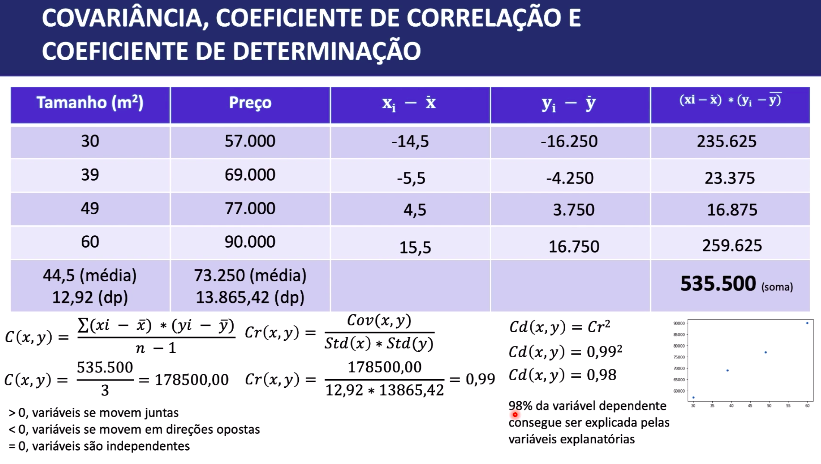

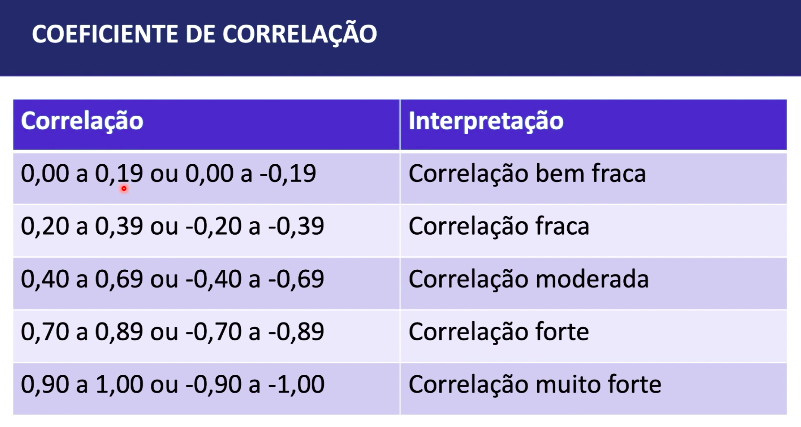

## Implementação dos coeficientes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

sns.set()

In [2]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
dataset = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dataset

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
m_tam = dataset['tamanho'].mean()
m_pre = dataset['preco'].mean()
m_tam, m_pre

(44.5, 73250.0)

In [5]:
dp_tam = dataset['tamanho'].std()
dp_pre = dataset['preco'].std()
dp_tam, dp_pre 

(12.922847983320086, 13865.424623862047)

### Correlação - cálculo manual

In [6]:
dataset['dif'] = (dataset['tamanho'] - m_tam) * (dataset['preco'] - m_pre)
dataset

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [8]:
covariancia = soma_dif / (len(dataset) - 1)
covariancia

178500.0

In [9]:
coeficiente_correlacao = covariancia / (dp_tam * dp_pre)
coeficiente_correlacao

0.9962006267707775

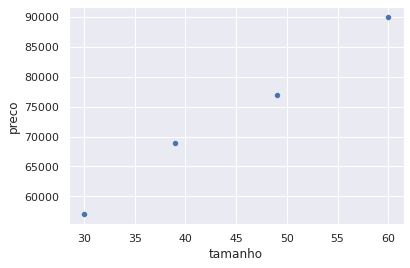

In [10]:
sns.scatterplot(data=dataset, x='tamanho', y='preco');

In [11]:
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Correlação - cálculo com numpy a pandas

In [12]:
np.cov(dataset['tamanho'], dataset['preco'])

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [13]:
dataset.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [14]:
np.corrcoef(dataset['tamanho'], dataset['preco'])

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [15]:
dataset.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


## Exercício - correlação base de dados preço das casas

In [16]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/house_prices.csv'
dataset_house_prices = pd.read_csv(path)

In [17]:
dataset_house_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
dataset_house_prices.iloc[:, 2:].cov()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.347824e+11,105286.276362,148481.495749,2.367154e+08,1.363437e+09,50908.003884,8460.643388,111772.969096,8687.030331,288026.499738,1.841014e+08,5.261406e+07,582448.362866,1.864486e+07,-1.045072e+06,15617.422517,1118.118066,1.472964e+08,8.264591e+08
bedrooms,1.052863e+05,0.865015,0.369527,4.925960e+02,1.221324e+03,0.088104,-0.000530,0.056684,0.017232,0.390254,3.678361e+02,1.247599e+02,4.212004,7.038678e+00,-7.597239e+00,-0.001151,0.016958,2.496518e+02,7.426446e+02
bathrooms,1.484815e+05,0.369527,0.593151,5.338120e+02,2.798944e+03,0.208211,0.004247,0.110800,-0.062638,0.602005,4.370876e+02,9.672443e+01,11.447333,1.569654e+01,-8.400840e+00,0.002622,0.024191,3.001611e+02,1.833182e+03
sqft_living,2.367154e+08,492.596040,533.811988,8.435337e+05,6.574684e+06,175.540402,8.249461,200.314304,-35.114601,823.407664,6.666978e+05,1.768358e+05,8580.237559,2.042442e+04,-9.800232e+03,6.685035,31.071084,4.761601e+05,4.596302e+06
sqft_lot,1.363437e+09,1221.324216,2798.943628,6.574684e+06,1.715659e+09,-116.328567,77.418670,2371.393311,-241.461641,5531.996968,6.294462e+06,2.802218e+05,64580.849602,1.271708e+05,-2.871637e+05,-491.766060,1338.836937,4.105319e+06,8.126540e+08
floors,5.090800e+04,0.088104,0.208211,1.755404e+02,-1.163286e+02,0.291588,0.001107,0.012184,-0.092686,0.290824,2.342603e+02,-5.871985e+01,7.761250,1.374814e+00,-1.708121e+00,0.003712,0.009538,1.035866e+02,-1.661524e+02
waterfront,8.460643e+03,-0.000530,0.004247,8.249461e+00,7.741867e+01,0.001107,0.007485,0.026643,0.000938,0.008418,5.163720e+00,3.085741e+00,-0.066483,3.227949e+00,1.401912e-01,-0.000171,-0.000511,5.127103e+00,7.252979e+01
view,1.117730e+05,0.056684,0.110800,2.003143e+02,2.371393e+03,0.012184,0.026643,0.587243,0.022934,0.226383,1.063870e+02,9.392727e+01,-1.202897,3.198718e+01,3.478060e+00,0.000654,-0.008461,1.472943e+02,1.518526e+03
condition,8.687030e+03,0.017232,-0.062638,-3.511460e+01,-2.414616e+02,-0.092686,0.000938,0.022934,0.423467,-0.110664,-8.525727e+01,5.014267e+01,-6.908312,-1.584488e+01,1.053428e-01,-0.001347,-0.009760,-4.140089e+01,-6.050935e+01
grade,2.880265e+05,0.390254,0.602005,8.234077e+02,5.531997e+03,0.290824,0.008418,0.226383,-0.110664,1.381703,7.358054e+02,8.760226e+01,15.432403,6.805809e+00,-1.162652e+01,0.018582,0.032838,5.745907e+02,3.827254e+03


In [19]:
dataset_house_prices.iloc[:, 2:].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


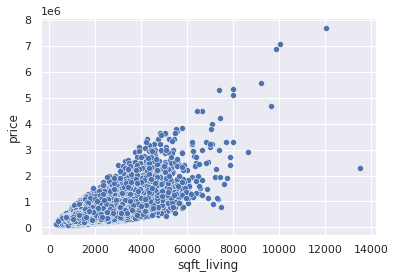

In [20]:
sns.scatterplot(data=dataset_house_prices, x='sqft_living', y='price');

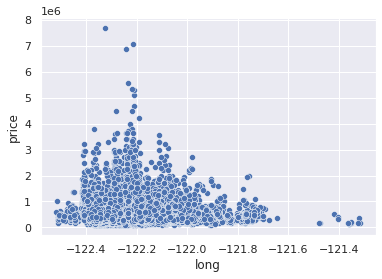

In [21]:
sns.scatterplot(data=dataset_house_prices, x='long', y='price');

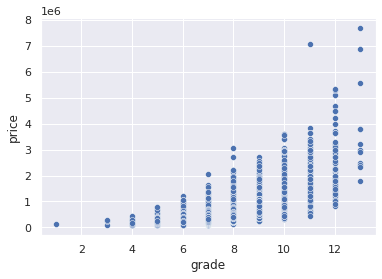

In [22]:
sns.scatterplot(data=dataset_house_prices, x='grade', y='price');

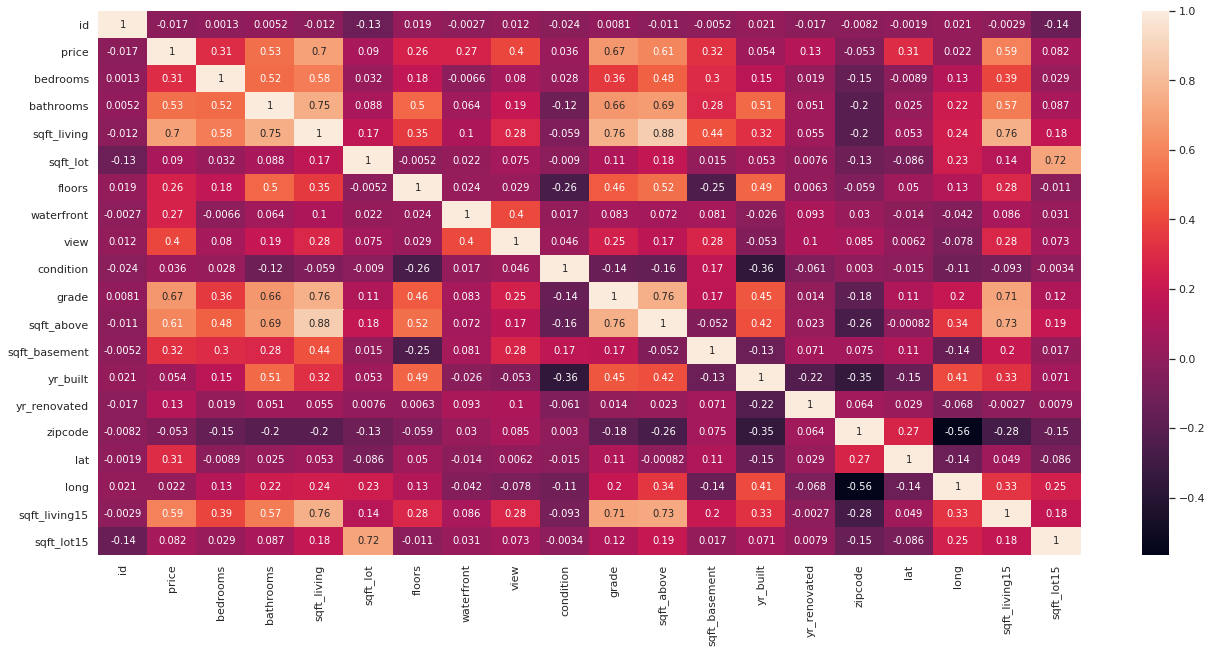

In [23]:
plt.subplots(figsize=(22,10))
sns.heatmap(dataset_house_prices.corr(), annot=True);

## Correlação entre variáveis com Yellowbrick

- https://www.scikit-yb.org/en/latest/

In [24]:
!pip install yellowbrick --upgrade

     |████████████████████████████████| 276kB 4.1MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [25]:
from yellowbrick.target import FeatureCorrelation

In [26]:
dataset_house_prices = dataset_house_prices.iloc[:, 2:]

In [27]:
dataset_house_prices.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
grafico = FeatureCorrelation(labels=dataset_house_prices.columns[1:])

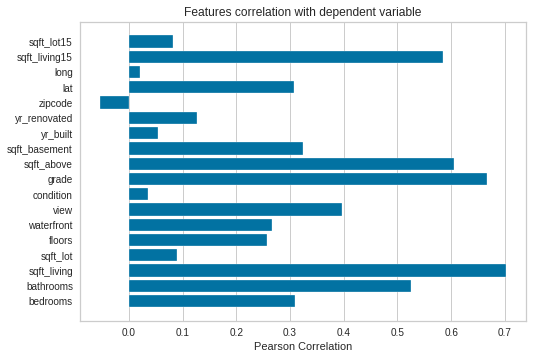

In [29]:
grafico.fit(dataset_house_prices.iloc[:, 1:].values, dataset_house_prices.iloc[:, 0].values)
grafico.show();

## Regressão

- Correlação: relacionamento entre variáveis, uma variável afeta a outra. Duas vias: correlação de price x sqft_living = correlação sqft_living x price
- Regressão é uma via: sqft_living para prever o preço é diferente de utilizar o preço para prever sqft_living
- Espera-se que a correlação seja de moderada a forte para obter um bom modelo (positiva ou negativa)
- Coeficiente de determinação (R2): > 0.7 é um bom valor. Entre 0 e 0.3 é ruim. Entre esses valores é interessante fazer testes
- Regressão linear: existir lineariedade

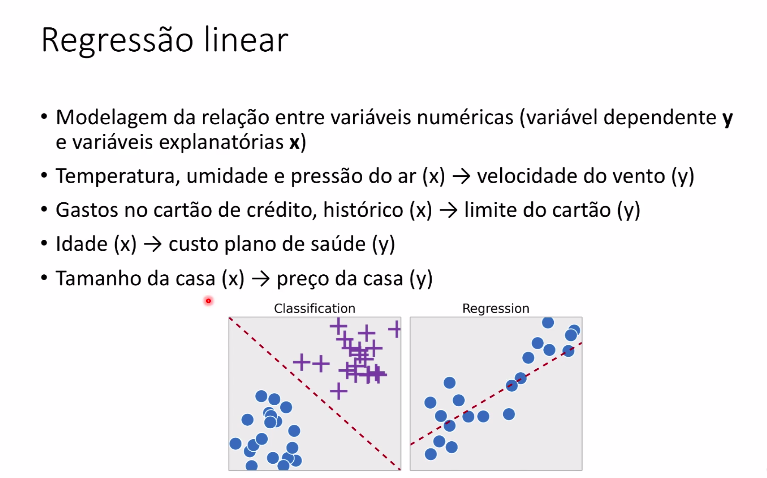

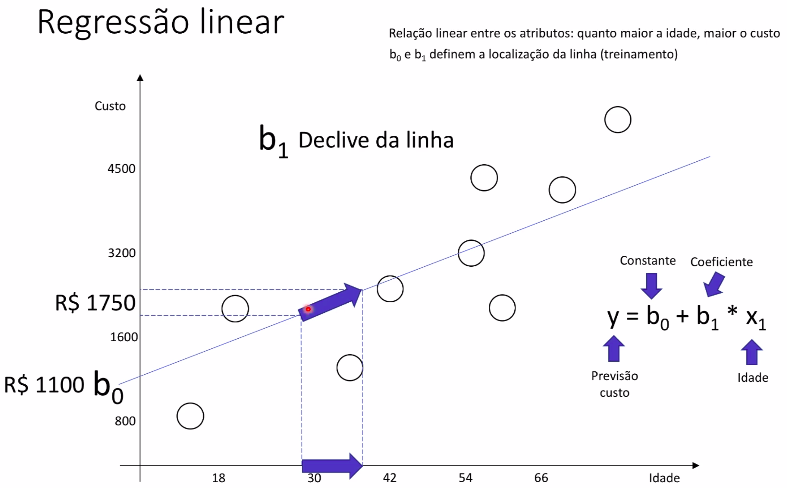

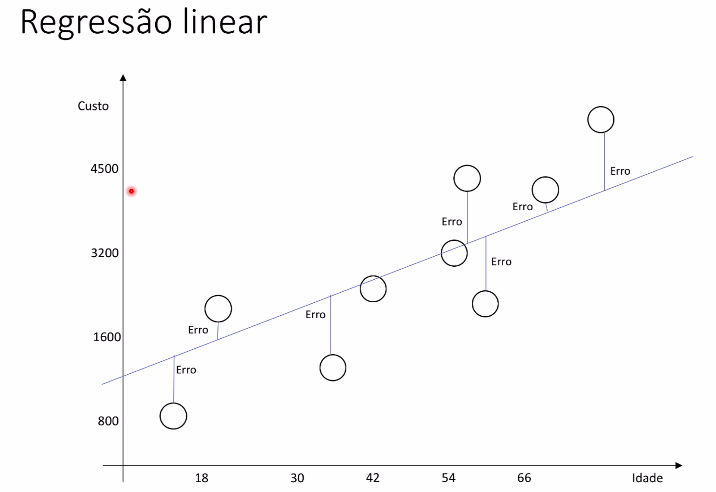

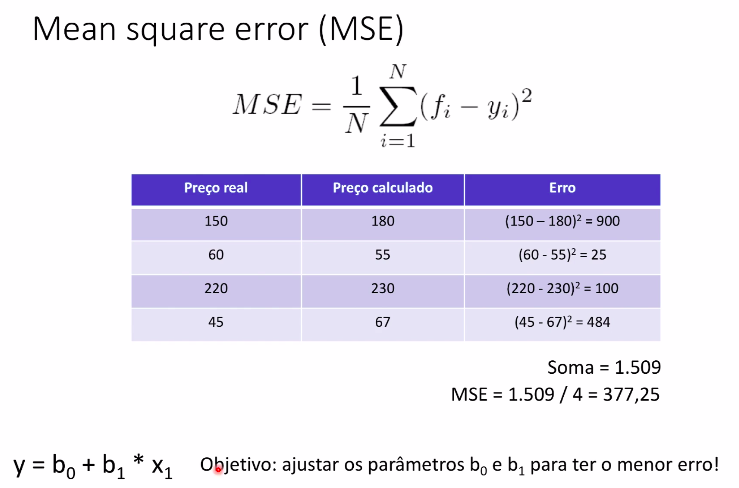

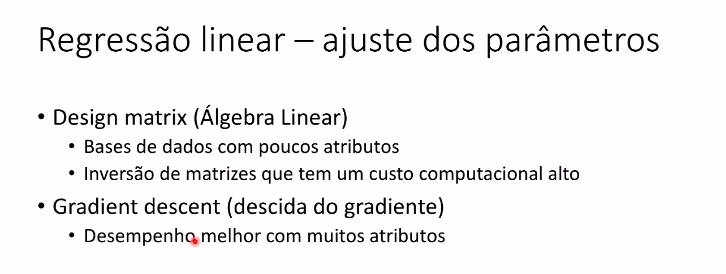

### Regressão linear simples - implementação
 
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [30]:
dataset_house_prices = pd.read_csv(path)
dataset_house_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
dataset_house_prices.drop(labels=['id', 'date'], axis=1, inplace=True)
dataset_house_prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


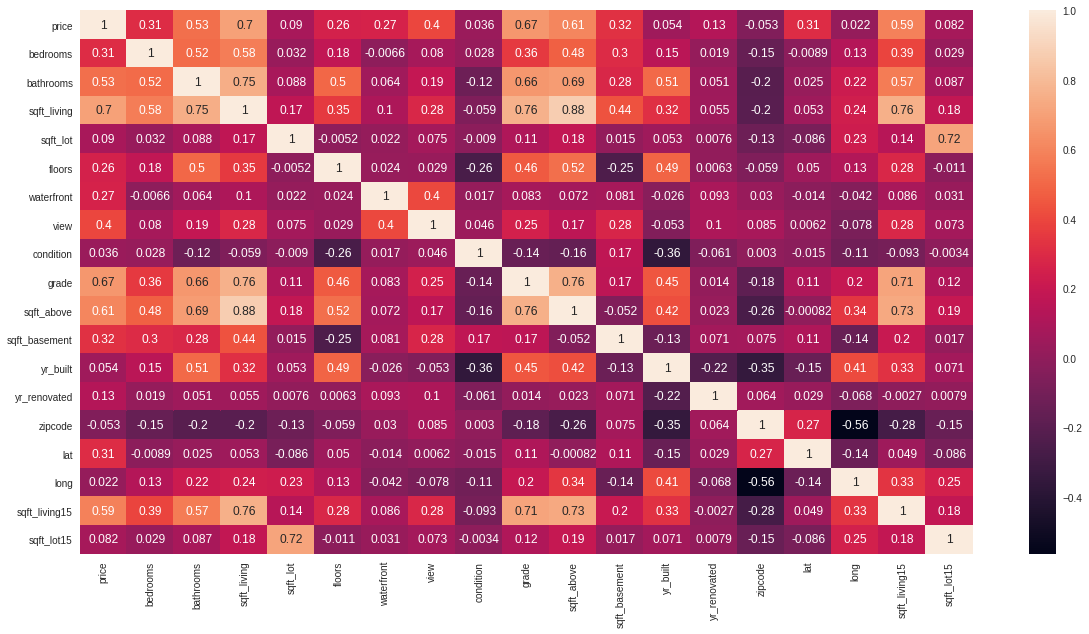

In [32]:
plt.subplots(figsize=(20,10))
sns.heatmap(dataset_house_prices.corr(), annot=True);

In [33]:
math.pow(0.7, 2) # 48,99 % do price da casa pode ser explicado por sqft_living

0.48999999999999994

In [34]:
x = dataset_house_prices['sqft_living'].values
x.shape

(21613,)

In [35]:
x = x.reshape(-1, 1)
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [36]:
y = dataset_house_prices['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                  test_size=0.2,
                                                                  random_state=1)

In [39]:
x_treinamento.shape, x_teste.shape

((17290, 1), (4323, 1))

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regressor = LinearRegression()

In [42]:
regressor.fit(x_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# b0
regressor.intercept_

-30186.361061054864

In [44]:
# b1
regressor.coef_

array([273.82181112])

In [45]:
regressor.intercept_ + regressor.coef_ * 770

array([180656.43350266])

In [46]:
regressor.intercept_ + regressor.coef_ * 500

array([106724.5444998])

In [47]:
regressor.intercept_ + regressor.coef_ * 900

array([216253.26894848])

In [48]:
regressor.predict([[900]])

array([216253.26894848])

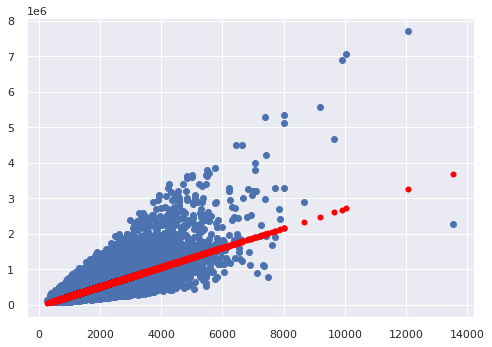

In [49]:
sns.set()
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), 'o', color='red')
plt.show()

In [50]:
regressor.score(x_treinamento, y_treinamento)

0.4887607821388749

In [51]:
regressor.score(x_teste, y_teste)

0.5033019006466926

### Métricas de erros

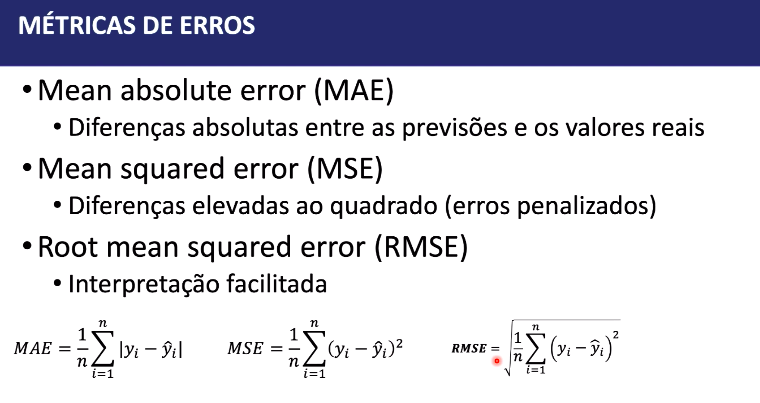

In [52]:
previsoes = regressor.predict(x_teste)

In [53]:
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mean_absolute_error(y_teste, previsoes)

178578.01159005202

In [56]:
mean_squared_error(y_teste, previsoes)

85730574276.16481

In [57]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.8385783693

### Regressão linear múltipla

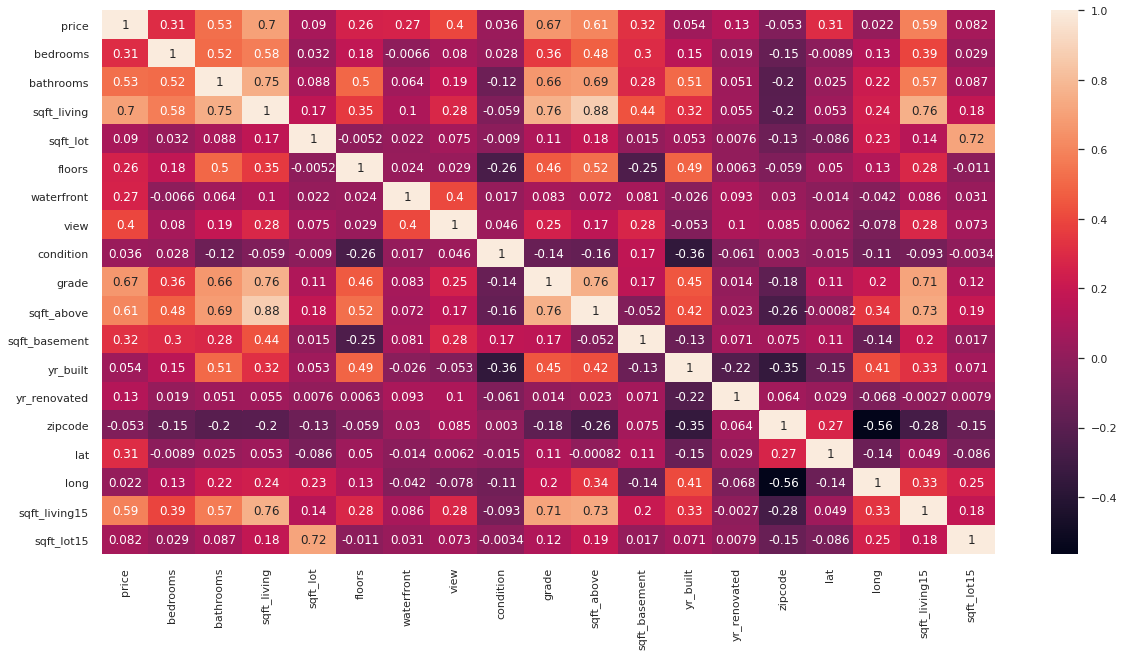

In [58]:
plt.subplots(figsize=(20,10))
sns.heatmap(dataset_house_prices.corr(), annot=True);

In [59]:
dataset_house_prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
cols = ['bathrooms', 'sqft_living', 'grade', 'sqft_above']

In [63]:
x = dataset_house_prices[cols].values
x

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

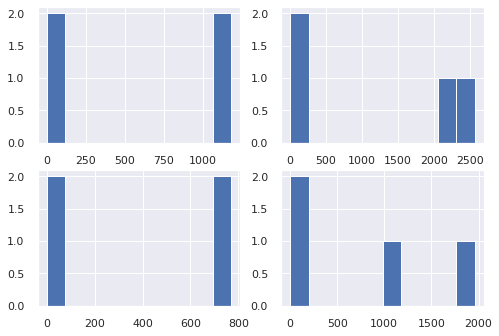

In [74]:
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(x[0])
ax[0, 1].hist(x[1])
ax[1, 0].hist(x[2])
ax[1, 1].hist(x[3]);

In [64]:
y = dataset_house_prices['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

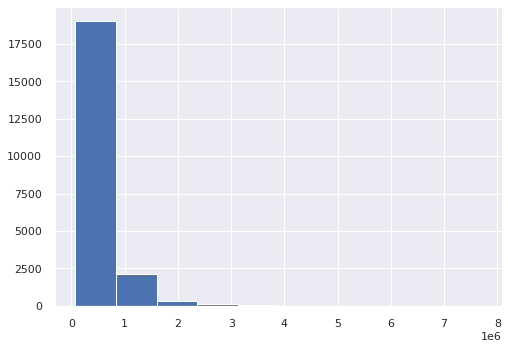

In [75]:
plt.hist(y);

In [76]:
y = np.log(y)

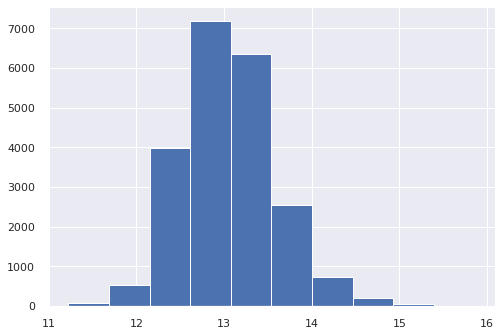

In [77]:
plt.hist(y);

In [78]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                  test_size=0.2,
                                                                  random_state=1)

In [79]:
x_treinamento.shape, x_teste.shape

((17290, 4), (4323, 4))

In [67]:
from sklearn.linear_model import LinearRegression

In [80]:
regressor = LinearRegression()

In [81]:
regressor.fit(x_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
regressor.score(x_treinamento, y_treinamento)

0.559462085496587

In [83]:
regressor.score(x_teste, y_teste)

0.583736323335128

In [84]:
previsoes = regressor.predict(x_teste)
mean_absolute_error(y_teste, previsoes)

0.27631915119456746

## Exercício

In [92]:
x = dataset_house_prices.iloc[:, 1:17].values

In [93]:
y = dataset_house_prices['price'].values

In [94]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                  test_size=0.2,
                                                                  random_state=1)

In [95]:
regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
regressor.score(x_treinamento, y_treinamento)

0.7028464225751405

In [97]:
regressor.score(x_teste, y_teste)

0.6849876187393011

### Seleção de atributos

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html

In [106]:
from sklearn.feature_selection import SelectFdr, f_regression
selecao = SelectFdr(f_regression, alpha = 0.1)
X_novo = selecao.fit_transform(x, y)
x.shape, X_novo.shape

((21613, 16), (21613, 16))

In [107]:
selecao.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.97250451e-040,
       1.58101007e-322, 0.00000000e+000, 0.00000000e+000, 8.93565406e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.92987281e-015,
       1.02134789e-077, 5.01105043e-015, 0.00000000e+000, 1.47509222e-003])

In [108]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [109]:
dataset_house_prices.columns[1:17]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [110]:
dataset_house_prices.columns[1:17][colunas == True]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_novo, 
                                                                  y, test_size = 0.2, 
                                                                  random_state = 1)
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
regressor.score(X_treinamento, y_treinamento)

0.7028464225751405

In [113]:
regressor.score(X_teste, y_teste)

0.6849876187393011